In [1]:
from utils import *
from bbq.polynomial import Polynomial
from bbq.bbq_code import BivariateBicycle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Polygon
import galois
from scipy.sparse import coo_matrix, hstack

## Compare to Bravyi

### Bravyi Code

In [898]:
a = Polynomial(2, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(2, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bb = BivariateBicycle(b, a, 6, 6, 1)
x_order = ['Idle', 1, 4, 3, 5, 0, 2]
z_order = [3, 5, 0, 1, 2, 4, 'Idle']
p = 0.001
num_cycles = 6
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

Bivariate Bicycle code for
a(x, y) = 0x^0y^0 + 1x^0y^1 + 1x^0y^2 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 1x^3y^0 + 0x^3y^1 + 0x^3y^2
b(x, y) = 0x^0y^0 + 0x^0y^1 + 0x^0y^2 + 1x^0y^3 + 1x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 1x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3


In [900]:
bb.z_logicals

[array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 1]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0]),


In [901]:
bb.x_logicals

[array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0]),


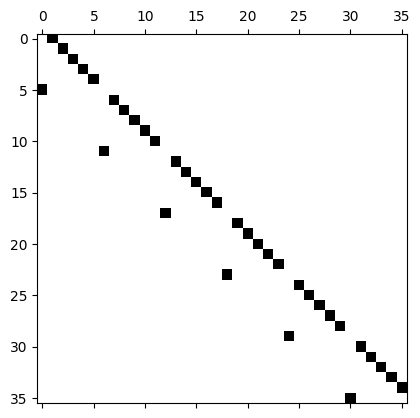

In [890]:
plt.spy(bb.A[0]);

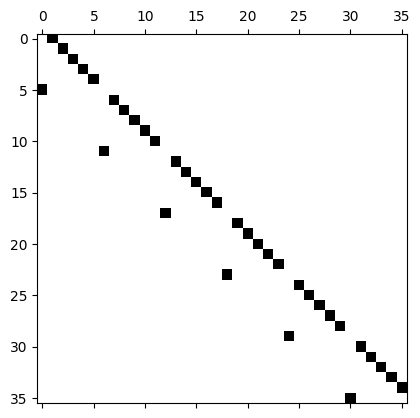

In [891]:
plt.spy(A2);

In [892]:
bb.A = [A1, A2, A3]
bb.B = [B1, B2, B3]
bb.edges = bb._edges()
bb.data_qubits = data_qubits

In [893]:
qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
# lx, lz = bb.x_logicals, bb.z_logicals
circ = construct_sm_circuit(bb, x_order, z_order)
# hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

In [894]:
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, x_circuit, z_circuit = construct_decoding_matrix(bb, circ, error_rates, num_cycles)

In [ ]:
def construct_sm_circuit(self, x_order : list, z_order : list) -> list:
    """Construct one cycle of the syndrome measurement circuit for the Bivariate Bicycle code.
    
    Parameters
    ----------
    x_order : list
        List of integers or 'Idle' defining the order of the CNOTs for x stabilisers.
    y_order : list
        List of integers or 'Idle' defining the order of the CNOTs for y stabilisers.
    
    Returns
    -------
    circ : list
        List of gates in one cycle of the syndrome circuit: ('CNOT', control_qubit, target_qubit, power), ('Idle', qubit), ('Meas_X', qubit), ('Meas_Z', qubit), ('Prep_X', qubit), ('Prep_Z', qubit).
    """
    if not isinstance(x_order, list):
        raise TypeError("x_order must be a list")
    if not isinstance(z_order, list):
        raise TypeError("y_order must be a list")
    for gate in x_order:
        if not (isinstance(gate, int) or gate == 'Idle'):
            raise TypeError("x_order must be an array of integers or 'Idle'")
    for gate in z_order:
        if not (isinstance(gate, int) or gate == 'Idle'):
            raise TypeError("z_order must be an array of integers or 'Idle'")
    if not x_order[0] == 'Idle':
        raise ValueError("First x_order round must be 'Idle'")
    if not z_order[-1] == 'Idle':
        raise ValueError("Last y_order round must be 'Idle'")
    for i in range(len(np.nonzero(self.hx[0])[0])):
        if i not in x_order:
            raise ValueError("x_order must contain all target qubits")
    for i in range(len(np.nonzero(self.hz[0])[0])):
        if i not in z_order:
            raise ValueError("y_order must contain all target qubits")
    if len(x_order) > len(z_order):
        z_order += ['Idle'] * (len(x_order) - len(z_order))
    elif len(z_order) > len(x_order):
        x_order += ['Idle'] * (len(z_order) - len(x_order))

    hx, hz = self.hx, self.hz
    a, b = self.a, self.b
    l, m, q = self.l, self.m, self.q
    field = self.field
    A, B = self.A, self.B
    qubits_dict, data_qubits, x_checks, z_checks = self.qubits_dict, self.data_qubits, self.x_checks, self.z_checks
    edges = self.edges

    # Construct the circuit
    circ = []
    U = np.identity(4*l*m, dtype=int)  # to verify CNOT order

    # For each time step, add the corresponding gate:
    # ('CNOT', control_qubit, target_qubit, power), ('Idle', qubit), ('Meas_X', qubit), ('Meas_Y', qubit), ('Prep_X', qubit)

    # Round 0: Prepare X checks, CNOT/Idle Z checks
    t = 0
    cnoted_data_qubits = []
    for qubit in x_checks:
        circ.append(('Prep_X', qubit))
    if z_order[t] == 'Idle':
        for qubit in z_checks:
            circ.append(('Idle', qubit))
    else:
        for target in z_checks:
            direction = z_order[t]
            control, power = edges[(target, direction)]
            U[qubits_dict[target], :] = (U[qubits_dict[target], :] + power * U[qubits_dict[control], :]) % field
            cnoted_data_qubits.append(control)
            circ.append(('CNOT', control, target, power))
    for qubit in data_qubits:
        if not (qubit in cnoted_data_qubits):
            circ.append(('Idle', qubit))

    # Round [1, (max-1)]: CNOT/Idle X checks, CNOT/Idle Z checks
    for t in range(1, len(x_order)-1):
        cnoted_data_qubits = []
        if x_order[t] == 'Idle':
            for qubit in x_checks:
                circ.append(('Idle', qubit))
        else:
            for control in x_checks:
                direction = x_order[t]
                target, power = edges[(control, direction)]
                U[qubits_dict[target], :] = (U[qubits_dict[target], :] + power * U[qubits_dict[control], :]) % field
                cnoted_data_qubits.append(target)
                circ.append(('CNOT', control, target, power))
        if z_order[t] == 'Idle':
            for qubit in z_checks:
                circ.append(('Idle', qubit))
        else:
            for target in z_checks:
                direction = z_order[t]
                control, power = edges[(target, direction)]
                U[qubits_dict[target], :] = (U[qubits_dict[target], :] + power * U[qubits_dict[control], :]) % field
                cnoted_data_qubits.append(control)
                circ.append(('CNOT', control, target, power))
        for qubit in data_qubits:
            if not (qubit in cnoted_data_qubits):
                circ.append(('Idle', qubit))

    # Round max: CNOT/Idle X checks, Measure Z checks
    t = -1
    cnoted_data_qubits = []
    for qubit in z_checks:
        circ.append(('Meas_Z', qubit))
    if x_order[t] == 'Idle':
        for qubit in x_checks:
            circ.append(('Idle', qubit))
    else:
        for control in x_checks:
            direction = x_order[t]
            target, power = edges[(control, direction)]
            U[qubits_dict[target], :] = (U[qubits_dict[target], :] + power * U[qubits_dict[control], :]) % field
            circ.append(('CNOT', control, target, power))
            cnoted_data_qubits.append(target)
    for qubit in data_qubits:
        if not (qubit in cnoted_data_qubits):
            circ.append(('Idle', qubit))
    
    # Round final: Measure X checks, Prepare Z checks
    for qubit in data_qubits:
        circ.append(('Idle', qubit))
    for qubit in x_checks:
        circ.append(('Meas_X', qubit))
    for qubit in z_checks:
        circ.append(('Prep_Z', qubit))

    # Test measurement circuit against max depth circuit
    V = np.identity(4*l*m, dtype=int)
    for t in range(len(x_order)):
        if not x_order[t] == 'Idle':
            for control in x_checks:
                direction = x_order[t]
                target, power = edges[(control, direction)]
                V[qubits_dict[target], :] = (V[qubits_dict[target], :] + power * V[qubits_dict[control], :]) % field
    for t in range(len(z_order)):
        if not z_order[t] == 'Idle':
            for target in z_checks:
                direction = z_order[t]
                control, power = edges[(target, direction)]
                V[qubits_dict[target], :] = (V[qubits_dict[target], :] + power * V[qubits_dict[control], :]) % field
    if not np.array_equal(U, V):
        raise ValueError("Syndrome circuit does not match max depth syndrome circuit, check stabiliser orders")

    return circ

In [889]:
lx, lz = np.array(bb.x_logicals), np.array(bb.z_logicals)

import numpy as np
import itertools
# from ldpc import bposd_decoder
# from bposd.css import css_code
import pickle
from scipy.sparse import coo_matrix
from scipy.sparse import hstack


# Takes as input a binary square matrix A
# Returns the rank of A over the binary field F_2
def rank2(A):
    rows,n = A.shape
    X = np.identity(n,dtype=int)

    for i in range(rows):
        y = np.dot(A[i,:], X) % 2
        not_y = (y + 1) % 2
        good = X[:,np.nonzero(not_y)]
        good = good[:,0,:]
        bad = X[:, np.nonzero(y)]
        bad = bad[:,0,:]
        if bad.shape[1]>0 :
            bad = np.add(bad,  np.roll(bad, 1, axis=1) ) 
            bad = bad % 2
            bad = np.delete(bad, 0, axis=1)
            X = np.concatenate((good, bad), axis=1)
    # now columns of X span the binary null-space of A
    return n - X.shape[1]





# depolarizing noise model 
error_rate = 0.003
error_rate_init = error_rate
error_rate_idle = error_rate
error_rate_cnot = error_rate
error_rate_meas = error_rate




# syndrome cycle with 7 CNOT rounds
# sX and sZ define the order in which X-check and Z-check qubit
# is coupled with the neighboring data qubits
# We label the six neighbors of each check qubit in the Tanner graph
# by integers 0,1,...,5
sX= ['idle', 1, 4, 3, 5, 0, 2]
sZ= [3, 5, 0, 1, 2, 4, 'idle']


# number of syndrome measurement cycles 
# num_cycles = 1


# Parameters of a Bivariate Bicycle (BB) code
# see Section 4 of https://arxiv.org/pdf/2308.07915.pdf for notations
# The code is defined by a pair of polynomials
# A and B that depends on two variables x and y such that
# x^ell = 1
# y^m = 1
# A = x^{a_1} + y^{a_2} + y^{a_3} 
# B = y^{b_1} + x^{b_2} + x^{b_3}

# [[144,12,12]]
#ell,m = 12,6
#a1,a2,a3 = 3,1,2
#b1,b2,b3 = 3,1,2

# [[784,24,24]]
#ell,m = 28,14
#a1,a2,a3=26,6,8
#b1,b2,b3=7,9,20

# [[72,12,6]]
ell,m = 6,6
a1,a2,a3=3,1,2
b1,b2,b3=3,1,2


# Ted's code [[90,8,10]]
#ell,m = 15,3
#a1,a2,a3 = 9,1,2
#b1,b2,b3 = 0,2,7

# [[108,8,10]]
#ell,m = 9,6
#a1,a2,a3 = 3,1,2
#b1,b2,b3 = 3,1,2

# [[288,12,18]]
#ell,m = 12,12
#a1,a2,a3 = 3,2,7
#b1,b2,b3 = 3,1,2

# code length
n = 2*m*ell


n2 = m*ell

# Compute check matrices of X- and Z-checks


# cyclic shift matrices 
I_ell = np.identity(ell,dtype=int)
I_m = np.identity(m,dtype=int)
I = np.identity(ell*m,dtype=int)
x = {}
y = {}
for i in range(ell):
	x[i] = np.kron(np.roll(I_ell,i,axis=1),I_m)
for i in range(m):
	y[i] = np.kron(I_ell,np.roll(I_m,i,axis=1))


A = (x[a1] + y[a2] + y[a3]) % 2
B = (y[b1] + x[b2] + x[b3]) % 2

A1 = x[a1]
A2 = y[a2]
A3 = y[a3]
B1 = y[b1]
B2 = x[b2]
B3 = x[b3]

AT = np.transpose(A)
BT = np.transpose(B)

hx = np.hstack((A,B))
hz = np.hstack((BT,AT))

# number of logical qubits
k = n - rank2(hx) - rank2(hz)


# qcode=css_code(hx,hz)
# print('Testing CSS code...')
# qcode.test()
# print('Done')

# lz = qcode.lz
# lx = qcode.lx


# Give a name to each qubit
# Define a linear order on the set of qubits
lin_order = {}
data_qubits = []
Xchecks = []
Zchecks = []

cnt = 0
for i in range(n2):
    node_name = ('Xcheck', i)
    Xchecks.append(node_name)
    lin_order[node_name] = cnt
    cnt += 1

for i in range(n2):
    node_name = ('data_left', i)
    data_qubits.append(node_name)
    lin_order[node_name] = cnt
    cnt += 1
for i in range(n2):
    node_name = ('data_right', i)
    data_qubits.append(node_name)
    lin_order[node_name] = cnt
    cnt += 1


for i in range(n2):
    node_name = ('Zcheck', i)
    Zchecks.append(node_name)
    lin_order[node_name] = cnt
    cnt += 1


# compute the list of neighbors of each check qubit in the Tanner graph
nbs = {}
# iterate over X checks
for i in range(n2):
	check_name = ('Xcheck',i)
	# left data qubits
	nbs[(check_name,0)] = ('data_left',np.nonzero(A1[i,:])[0][0])
	nbs[(check_name,1)] = ('data_left',np.nonzero(A2[i,:])[0][0])
	nbs[(check_name,2)] = ('data_left',np.nonzero(A3[i,:])[0][0])
	# right data qubits
	nbs[(check_name,3)] = ('data_right',np.nonzero(B1[i,:])[0][0])
	nbs[(check_name,4)] = ('data_right',np.nonzero(B2[i,:])[0][0])
	nbs[(check_name,5)] = ('data_right',np.nonzero(B3[i,:])[0][0])

# iterate over Z checks
for i in range(n2):
	check_name = ('Zcheck',i)
	# left data qubits
	nbs[(check_name,0)] = ('data_left',np.nonzero(B1[:,i])[0][0])
	nbs[(check_name,1)] = ('data_left',np.nonzero(B2[:,i])[0][0])
	nbs[(check_name,2)] = ('data_left',np.nonzero(B3[:,i])[0][0])
	# right data qubits
	nbs[(check_name,3)] = ('data_right',np.nonzero(A1[:,i])[0][0])
	nbs[(check_name,4)] = ('data_right',np.nonzero(A2[:,i])[0][0])
	nbs[(check_name,5)] = ('data_right',np.nonzero(A3[:,i])[0][0])


# syndrome measurement cycle as a list of operations
cycle = [] 
U = np.identity(2*n,dtype=int)
# round 0: prep xchecks, CNOT zchecks and data
t=0
for q in Xchecks:
	cycle.append(('PrepX',q))
data_qubits_cnoted_in_this_round = []
assert(not(sZ[t]=='idle'))
for target in Zchecks:
	direction = sZ[t]
	control = nbs[(target,direction)]
	U[lin_order[target],:] = (U[lin_order[target],:] + U[lin_order[control],:]) % 2
	data_qubits_cnoted_in_this_round.append(control)
	cycle.append(('CNOT',control,target))
for q in data_qubits:
	if not(q in data_qubits_cnoted_in_this_round):
		cycle.append(('IDLE',q))

# round 1-5: CNOT xchecks and data, CNOT zchecks and data
for t in range(1,6):
	assert(not(sX[t]=='idle'))
	for control in Xchecks:
		direction = sX[t]
		target = nbs[(control,direction)]
		U[lin_order[target],:] = (U[lin_order[target],:] + U[lin_order[control],:]) % 2
		cycle.append(('CNOT',control,target))
	assert(not(sZ[t]=='idle'))
	for target in Zchecks:
		direction = sZ[t]
		control = nbs[(target,direction)]
		U[lin_order[target],:] = (U[lin_order[target],:] + U[lin_order[control],:]) % 2
		cycle.append(('CNOT',control,target))

# round 6: CNOT xchecks and data, measure Z checks
t=6
for q in Zchecks:
	cycle.append(('MeasZ',q))
assert(not(sX[t]=='idle'))
data_qubits_cnoted_in_this_round = []
for control in Xchecks:
	direction = sX[t]
	target = nbs[(control,direction)]
	U[lin_order[target],:] = (U[lin_order[target],:] + U[lin_order[control],:]) % 2
	cycle.append(('CNOT',control,target))
	data_qubits_cnoted_in_this_round.append(target)
for q in data_qubits:
	if not(q in data_qubits_cnoted_in_this_round):
		cycle.append(('IDLE',q))

# round 7: all data qubits are idle, Prep Z checks, Meas X checks
for q in data_qubits:
	cycle.append(('IDLE',q))
for q in Xchecks:
	cycle.append(('MeasX',q))
for q in Zchecks:
	cycle.append(('PrepZ',q))

# full syndrome measurement circuit
cycle_repeated = num_cycles*cycle


# test the syndrome measurement circuit

# implement syndrome measurements using the sequential depth-12 circuit
V = np.identity(2*n,dtype=int)
# first measure all X checks
for t in range(7):
	if not(sX[t]=='idle'):
		for control in Xchecks:
			direction = sX[t]
			target = nbs[(control,direction)]
			V[lin_order[target],:] = (V[lin_order[target],:] + V[lin_order[control],:]) % 2
# next measure all Z checks
for t in range(7):
	if not(sZ[t]=='idle'):
		for target in Zchecks:
			direction = sZ[t]
			control = nbs[(target,direction)]
			V[lin_order[target],:] = (V[lin_order[target],:] + V[lin_order[control],:]) % 2

if np.array_equal(U,V):
	print('circuit test: OK')
else:
	print('circuit test: FAIL')
	exit()


# Compute decoding matrices

print('error rate=',error_rate)
print('Generating noisy circuits with a singe Z-type faulty operation...')
ProbZ = []
circuitsZ = []
head = []
tail = cycle_repeated.copy()
for gate in cycle_repeated:
	assert(gate[0] in ['CNOT','IDLE','PrepX','PrepZ','MeasX','MeasZ'])
	if gate[0]=='MeasX':
		assert(len(gate)==2)
		circuitsZ.append(head + [('Z',gate[1])] + tail)
		ProbZ.append(error_rate_meas)
	# move the gate from tail to head
	head.append(gate)
	tail.pop(0)
	assert(cycle_repeated==(head+tail))
	if gate[0]=='PrepX':
		assert(len(gate)==2)
		circuitsZ.append(head + [('Z',gate[1])] + tail)
		ProbZ.append(error_rate_init)
	if gate[0]=='IDLE':
		assert(len(gate)==2)
		circuitsZ.append(head + [('Z',gate[1])] + tail)
		ProbZ.append(error_rate_idle*2/3)
	if gate[0]=='CNOT':
		assert(len(gate)==3)
		# add error on the control qubit
		circuitsZ.append(head + [('Z',gate[1])] + tail)
		ProbZ.append(error_rate_cnot*4/15)
		# add error on the target qubit
		circuitsZ.append(head + [('Z',gate[2])] + tail)
		ProbZ.append(error_rate_cnot*4/15)
		# add ZZ error on the control and the target qubits
		circuitsZ.append(head + [('ZZ',gate[1],gate[2])] + tail)
		ProbZ.append(error_rate_cnot*4/15)
		
num_errZ=len(circuitsZ)
print('Number of noisy circuits=',num_errZ)
print('Done.')


print('Generating noisy circuits with a singe X-type faulty operation...')
ProbX = []
circuitsX = []
head = []
tail = cycle_repeated.copy()
for gate in cycle_repeated:
	assert(gate[0] in ['CNOT','IDLE','PrepX','PrepZ','MeasX','MeasZ'])
	if gate[0]=='MeasZ':
		assert(len(gate)==2)
		circuitsX.append(head + [('X',gate[1])] + tail)
		ProbX.append(error_rate_meas)
	# move the gate from tail to head
	head.append(gate)
	tail.pop(0)
	assert(cycle_repeated==(head+tail))
	if gate[0]=='PrepZ':
		assert(len(gate)==2)
		circuitsX.append(head + [('X',gate[1])] + tail)
		ProbX.append(error_rate_init)
	if gate[0]=='IDLE':
		assert(len(gate)==2)
		circuitsX.append(head + [('X',gate[1])] + tail)
		ProbX.append(error_rate_idle*2/3)
	if gate[0]=='CNOT':
		assert(len(gate)==3)
		# add error on the control qubit
		circuitsX.append(head + [('X',gate[1])] + tail)
		ProbX.append(error_rate_cnot*4/15)
		# add error on the target qubit
		circuitsX.append(head + [('X',gate[2])] + tail)
		ProbX.append(error_rate_cnot*4/15)
		# add XX error on the control and the target qubits
		circuitsX.append(head + [('XX',gate[1],gate[2])] + tail)
		ProbX.append(error_rate_cnot*4/15)
		
	
num_errX=len(circuitsX)
print('Number of noisy circuits=',num_errX)
print('Done.')



# we only look at the action of the circuit on Z errors; 0 means no error, 1 means error
def simulate_circuitZ(C):
	syndrome_history = []
	# keys = Xchecks, vals = list of positions in the syndrome history array
	syndrome_map = {}
	state = np.zeros(2*n,dtype=int)
	# need this for debugging
	err_cnt = 0
	syn_cnt = 0
	for gate in C:
		if gate[0]=='CNOT':
			assert(len(gate)==3)
			control = lin_order[gate[1]]
			target = lin_order[gate[2]]
			state[control] = (state[target] + state[control]) % 2
			continue
		if gate[0]=='PrepX':
			assert(len(gate)==2)
			q = lin_order[gate[1]]
			state[q]=0
			continue
		if gate[0]=='MeasX':
			assert(len(gate)==2)
			assert(gate[1][0]=='Xcheck')
			q = lin_order[gate[1]]
			syndrome_history.append(state[q])
			if gate[1] in syndrome_map:
				syndrome_map[gate[1]].append(syn_cnt)
			else:
				syndrome_map[gate[1]] = [syn_cnt]
			syn_cnt+=1
			continue
		if gate[0] in ['Z','Y']:
			err_cnt+=1
			assert(len(gate)==2)
			q = lin_order[gate[1]]
			state[q] = (state[q] + 1) % 2
			continue

		if gate[0] in ['ZX', 'YX']:
			err_cnt+=1
			assert(len(gate)==3)
			q = lin_order[gate[1]]
			state[q] = (state[q] + 1) % 2
			continue

		if gate[0] in ['XZ','XY']:
			err_cnt+=1
			assert(len(gate)==3)
			q = lin_order[gate[2]]
			state[q] = (state[q] + 1) % 2
			continue

		if gate[0] in ['ZZ','YY','YZ','ZY']:
			err_cnt+=1
			assert(len(gate)==3)
			q1 = lin_order[gate[1]]
			q2 = lin_order[gate[2]]
			state[q1] = (state[q1] + 1) % 2
			state[q2] = (state[q2] + 1) % 2
			continue
	return np.array(syndrome_history,dtype=int),state,syndrome_map,err_cnt


# we only look at the action of the circuit on X errors; 0 means no error, 1 means error
def simulate_circuitX(C):
	syndrome_history = []
	# keys = Zchecks, vals = list of positions in the syndrome history array
	syndrome_map = {}
	state = np.zeros(2*n,dtype=int)
	# need this for debugging
	err_cnt = 0
	syn_cnt = 0
	for gate in C:
		if gate[0]=='CNOT':
			assert(len(gate)==3)
			control = lin_order[gate[1]]
			target = lin_order[gate[2]]
			state[target] = (state[target] + state[control]) % 2
			continue
		if gate[0]=='PrepZ':
			assert(len(gate)==2)
			q = lin_order[gate[1]]
			state[q]=0
			continue
		if gate[0]=='MeasZ':
			assert(len(gate)==2)
			assert(gate[1][0]=='Zcheck')
			q = lin_order[gate[1]]
			syndrome_history.append(state[q])
			if gate[1] in syndrome_map:
				syndrome_map[gate[1]].append(syn_cnt)
			else:
				syndrome_map[gate[1]] = [syn_cnt]
			syn_cnt+=1
			continue
		if gate[0] in ['X','Y']:
			err_cnt+=1
			assert(len(gate)==2)
			q = lin_order[gate[1]]
			state[q] = (state[q] + 1) % 2
			continue

		if gate[0] in ['XZ', 'YZ']:
			err_cnt+=1
			assert(len(gate)==3)
			q = lin_order[gate[1]]
			state[q] = (state[q] + 1) % 2
			continue

		if gate[0] in ['ZX','ZY']:
			err_cnt+=1
			assert(len(gate)==3)
			q = lin_order[gate[2]]
			state[q] = (state[q] + 1) % 2
			continue

		if gate[0] in ['XX','YY','XY','YX']:
			err_cnt+=1
			assert(len(gate)==3)
			q1 = lin_order[gate[1]]
			q2 = lin_order[gate[2]]
			state[q1] = (state[q1] + 1) % 2
			state[q2] = (state[q2] + 1) % 2
			continue
	return np.array(syndrome_history,dtype=int),state,syndrome_map,err_cnt




HXdict  = {}

# execute each noisy circuit and compute the syndrome
# we add two noiseless syndrome cycles at the end
print('Computing syndrome histories for single-X-type-fault circuits...')
cnt = 0
for circ in circuitsX:
	syndrome_history,state,syndrome_map,err_cnt = simulate_circuitX(circ+cycle+cycle)
	assert(err_cnt==1)
	assert(len(syndrome_history)==n2*(num_cycles+2))
	state_data_qubits = [state[lin_order[q]] for q in data_qubits]
	syndrome_final_logical = (lz @ state_data_qubits) % 2
	# apply syndrome sparsification map
	syndrome_history_copy = syndrome_history.copy()
	for c in Zchecks:
		pos = syndrome_map[c]
		assert(len(pos)==(num_cycles+2))
		for row in range(1,num_cycles+2):
			syndrome_history[pos[row]]+= syndrome_history_copy[pos[row-1]]
	syndrome_history%= 2
	syndrome_history_augmented = np.hstack([syndrome_history,syndrome_final_logical])
	supp = tuple(np.nonzero(syndrome_history_augmented)[0])
	if supp in HXdict:
		HXdict[supp].append(cnt)
	else:
		HXdict[supp]=[cnt]
	cnt+=1
	

first_logical_rowX = n2*(num_cycles+2)
print('Done.')

# if a subset of columns of H are equal, retain only one of these columns
print('Computing effective noise model for the X-decoder...')

num_errX = len(HXdict)
print('Number of distinct X-syndrome histories=',num_errX)
HX = []
HdecX = []
channel_probsX = []
for supp in HXdict:
	new_column = np.zeros((n2*(num_cycles+2)+k,1),dtype=int)
	new_column_short = np.zeros((n2*(num_cycles+2),1),dtype=int)
	new_column[list(supp),0] = 1
	new_column_short[:,0] = new_column[0:first_logical_rowX,0]
	HX.append(coo_matrix(new_column))
	HdecX.append(coo_matrix(new_column_short))
	channel_probsX.append(np.sum([ProbX[i] for i in HXdict[supp]]))
print('Done.')
HX = hstack(HX)
HdecX = hstack(HdecX)

print('Decoding matrix HX sparseness:')
print('max col weight=',np.max(np.sum(HdecX,0)))
print('max row weight=',np.max(np.sum(HdecX,1)))


# execute each noisy circuit and compute the syndrome
# we add two noiseless syndrome cycles at the end

HZdict  = {}

print('Computing syndrome histories for single-Z-type-fault circuits...')
cnt = 0
for circ in circuitsZ:
	syndrome_history,state,syndrome_map,err_cnt = simulate_circuitZ(circ+cycle+cycle)
	assert(err_cnt==1)
	assert(len(syndrome_history)==n2*(num_cycles+2))
	state_data_qubits = [state[lin_order[q]] for q in data_qubits]
	syndrome_final_logical = (lx @ state_data_qubits) % 2
	# apply syndrome sparsification map
	syndrome_history_copy = syndrome_history.copy()
	for c in Xchecks:
		pos = syndrome_map[c]
		assert(len(pos)==(num_cycles+2))
		for row in range(1,num_cycles+2):
			syndrome_history[pos[row]]+= syndrome_history_copy[pos[row-1]]
	syndrome_history%= 2
	syndrome_history_augmented = np.hstack([syndrome_history,syndrome_final_logical])
	supp = tuple(np.nonzero(syndrome_history_augmented)[0])
	if supp in HZdict:
		HZdict[supp].append(cnt)
	else:
		HZdict[supp]=[cnt]
	cnt+=1


first_logical_rowZ = n2*(num_cycles+2)
print('Done.')

# if a subset of columns of HZ are equal, retain only one of these columns
print('Computing effective noise model for the Z-decoder...')
num_errZ = len(HZdict)
print('Number of distinct Z-syndrome histories=',num_errZ)
HZ = []
HdecZ = []
channel_probsZ = []
for supp in HZdict:
	new_column = np.zeros((n2*(num_cycles+2)+k,1),dtype=int)
	new_column_short = np.zeros((n2*(num_cycles+2),1),dtype=int)
	new_column[list(supp),0] = 1
	new_column_short[:,0] = new_column[0:first_logical_rowZ,0]
	HZ.append(coo_matrix(new_column))
	HdecZ.append(coo_matrix(new_column_short))
	channel_probsZ.append(np.sum([ProbZ[i] for i in HZdict[supp]]))
print('Done.')
HZ = hstack(HZ)
HdecZ = hstack(HdecZ)


print('Decoding matrix HZ sparseness:')
print('max col weight=',np.max(np.sum(HdecZ,0)))
print('max row weight=',np.max(np.sum(HdecZ,1)))


# save decoding matrices 

mydata = {}
mydata['HdecX']=HdecX
mydata['HdecZ']=HdecZ
mydata['probX']=channel_probsX
mydata['probZ']=channel_probsZ
mydata['cycle']=cycle
mydata['lin_order']=lin_order
mydata['num_cycles']=num_cycles
mydata['data_qubits']=data_qubits
mydata['Xchecks']=Xchecks
mydata['Zchecks']=Zchecks
mydata['HX']=HX
mydata['HZ']=HZ
mydata['lx']=lx
mydata['lz']=lz
mydata['first_logical_rowZ']=first_logical_rowZ
mydata['first_logical_rowX']=first_logical_rowX
mydata['ell']=ell
mydata['m']=m
mydata['a1']=a1
mydata['a2']=a2
mydata['a3']=a3
mydata['b1']=b1
mydata['b2']=b2
mydata['b3']=b3
mydata['error_rate']=error_rate
mydata['sX']=sX
mydata['sZ']=sZ

print('Done')

circuit test: OK
error rate= 0.003
Generating noisy circuits with a singe Z-type faulty operation...
Number of noisy circuits= 9072
Done.
Generating noisy circuits with a singe X-type faulty operation...
Number of noisy circuits= 9072
Done.
Computing syndrome histories for single-X-type-fault circuits...
Done.
Computing effective noise model for the X-decoder...
Number of distinct X-syndrome histories= 2269
Done.
Decoding matrix HX sparseness:
max col weight= 6
max row weight= 35
Computing syndrome histories for single-Z-type-fault circuits...
Done.
Computing effective noise model for the Z-decoder...
Number of distinct Z-syndrome histories= 2233
Done.
Decoding matrix HZ sparseness:
max col weight= 6
max row weight= 35
Done


In [665]:
# beat 0.06

simulate(bb, 50, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, verbose=False)

0.06000000000000005

In [897]:
simulate(bb, 20, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, verbose=False)

0.5

In [ ]:
simulate(bb, 10, circ, error_rates, num_cycles, HX, HdecX, HZ, HdecZ, channel_probsX, channel_probsZ, verbose=False)

0.9

In [675]:
for i in range(len(x_circuit)):
    syndrome_hist, stat, mapp, err = bb._simulate_x_circuit(x_circuit[i])
    syndrome_hist_2, state_2, mapp_2, err_2 = simulate_circuitX(circuitsX[i])
    if not np.array_equal(syndrome_hist, syndrome_hist_2):
        print(i, syndrome_hist, syndrome_hist_2)
    if not np.array_equal(stat, state_2):
        print(i, stat, state_2)

In [676]:
for j in range(HdecX.shape[1]):
    if not (HdecX.toarray()[:, j] == short_hx_eff.toarray()[:, j]).all():
        print(j)

In [677]:
HdecX.shape

(288, 2521)

In [678]:
short_hx_eff.shape

(288, 2521)

## Debugging construction

In [35]:
# Testing...

a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))
bb = BivariateBicycle(a, b, 2, 2, 1)
x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']
p = 0.01
num_cycles = 2
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = bb.construct_sm_circuit(x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 1x^1y^0 + 0x^1y^1
b(x, y) = 1x^0y^0 + 1x^0y^1 + 0x^1y^0 + 0x^1y^1


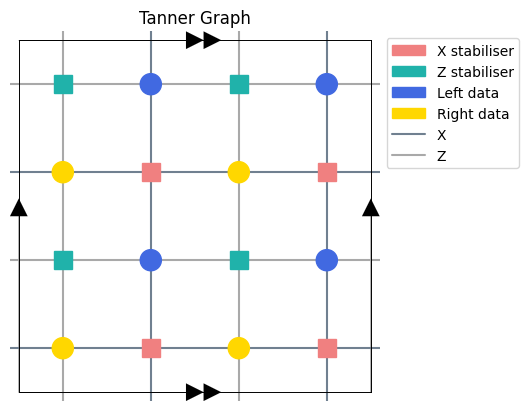

In [3]:
bb.draw()

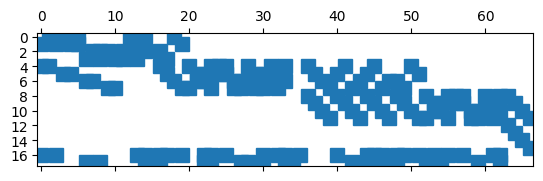

In [4]:
plt.spy(hx_eff);

In [559]:
def construct_decoding_matrix(self, circ : list, error_rates : dict, num_cycles : int = 1) -> np.ndarray:
    """Construct decoding matrix for a given syndrome circuit.
    
    Parameters
    ----------
    circ : list
        List of gates in one cycle of the syndrome circuit: ('CNOT', control_qubit, target_qubit, power), ('Idle', qubit), ('Meas_X', qubit), ('Meas_Z', qubit), ('Prep_X', qubit), ('Prep_Z', qubit).
    error_rate : dict
        Dictionary of error rates for keys [Meas, Prep, Idle, CNOT].
    num_cycles : int
        Number of cycles to repeat the syndrome circuit. Default is 1.
    
    Returns
    -------
    hx_eff : coo_matrix
        Decoding matrix for X stabilisers.    
    short_hx_eff : coo_matrix
        Decoding matrix for X stabilisers without columns for logicals.    
    hz_eff : coo_matrix
        Decoding matrix for Z stabilisers.    
    short_hz_eff : coo_matrix
        Decoding matrix for Z stabilisers without columns for logicals.
    channel_prob_x : list
        List of probabilities for each X syndrome, i.e. each column in hx_eff.    
    channel_prob_z : list
        List of probabilities for each Z syndrome, i.e. each column in hz_eff.
    """
    if not (isinstance(error_rates, dict)):
        raise TypeError("error_rates must be a dictionary")
    for key in error_rates.keys():
        if (key not in ['Meas', 'Prep', 'Idle', 'CNOT']) or (len(error_rates) != 4):
            raise ValueError("error_rates must have keys ['Meas', 'Prep', 'Idle', 'CNOT']")
        if not (isinstance(error_rates[key], float) and 0 <= error_rates[key] <= 1):
            raise ValueError("error_rates must have values between 0 and 1")
    if not (isinstance(num_cycles, int) and num_cycles > 0):
        raise TypeError("num_cycles must be a positive integer")

    l, m = self.l, self.m
    field = self.field
    qubits_dict, data_qubits = self.qubits_dict, self.data_qubits
    x_logicals, z_logicals = self.x_logicals, self.z_logicals
    x_checks, z_checks = self.x_checks, self.z_checks

    # Construct repeated circuit
    repeated_circ = circ * num_cycles

    # Single error circuits
    z_prob, z_circuit = [], []
    x_prob, x_circuit = [], []
    head = []
    tail = repeated_circ.copy()
    for gate in repeated_circ:
        # assert gate[0] in ['CNOT', 'Idle', 'Meas_X', 'Meas_Z', 'Prep_X', 'Prep_Z']
        if gate[0] == 'Meas_X':
            # Meas_X error only affects Z detectors
            z_circuit.append(head + [('Z', gate[1])] + tail)
            z_prob.append(error_rates['Meas'])
        if gate[0] == 'Meas_Z':
            # Meas_Z error only affects X detectors
            x_circuit.append(head + [('X', gate[1])] + tail)
            x_prob.append(error_rates['Meas'])
        head.append(gate)
        tail.pop(0)
        # assert repeated_circ == head + tail
        if gate[0] == 'Prep_X':
            # Prep_X error only affects Z detectors
            z_circuit.append(head + [('Z', gate[1])] + tail)
            z_prob.append(error_rates['Prep'])
        if gate[0] == 'Prep_Z':
            # Prep_Z error only affects X detectors
            x_circuit.append(head + [('X', gate[1])] + tail)
            x_prob.append(error_rates['Prep'])
        if gate[0] == 'Idle':
            # Idle error on Z detectors
            z_circuit.append(head + [('Z', gate[1])] + tail)
            z_prob.append(error_rates['Idle']*2/3)  # 3 possible Idle errors are X, Y, Z so Z is 2/3 (Y and Z)
            # Idle error on X detectors
            x_circuit.append(head + [('X', gate[1])] + tail)
            x_prob.append(error_rates['Idle']*2/3)
        if gate[0] == 'CNOT':
            # Z error on control
            z_circuit.append(head + [('Z', gate[1])] + tail)
            z_prob.append(error_rates['CNOT']*4/15)  # possible CNOT errors are IX, IY, ..., ZZ so Z is 4/15 (IZ, IY, XZ and XY)
            # Z error on target
            z_circuit.append(head + [('Z', gate[2])] + tail)
            z_prob.append(error_rates['CNOT']*4/15)
            # Z error on both
            z_circuit.append(head + [('ZZ', gate[1], gate[2])] + tail)
            z_prob.append(error_rates['CNOT']*4/15)
            # X error on control
            x_circuit.append(head + [('X', gate[1])] + tail)
            x_prob.append(error_rates['CNOT']*4/15)
            # X error on target
            x_circuit.append(head + [('X', gate[2])] + tail)
            x_prob.append(error_rates['CNOT']*4/15)
            # X error on both
            x_circuit.append(head + [('XX', gate[1], gate[2])] + tail)
            x_prob.append(error_rates['CNOT']*4/15)

    # Execute each noisy X circuit and compute syndrome
    # Add two noiseless syndrome cycles to end
    cnt = 0
    Hx_dict = {}
    for x_circ in x_circuit:
        syndrome_history, state, syndrome_map, err_cnt = self._simulate_x_circuit(x_circ + circ + circ)
        assert err_cnt == 1
        assert len(syndrome_history) == l * m * (num_cycles + 2)

        # Compute final state of data qubits and logical effect
        state_data_qubits = [state[qubits_dict[qubit]] for qubit in data_qubits]
        syndrome_final_logical = (np.array(z_logicals) @ state_data_qubits) % field

        # Syndrome sparsification, i.e. only keep syndrome entries that change from previous cycle
        syndrome_history_copy = syndrome_history.copy()
        for check in z_checks:
            pos = syndrome_map[check]
            assert len(pos) == num_cycles + 2
            for row in range(1, num_cycles + 2):
                syndrome_history[pos[row]] += syndrome_history_copy[pos[row-1]]
        syndrome_history %= field

        # Combine syndrome_history and syndrome_final_logical
        syndrome_history_augmented = np.hstack([syndrome_history, syndrome_final_logical])

        # Hx_dict maps flagged Z stabilisers to corresponding noisy circuit, i.e. Hx_dict[flagged_z_stab] = [noisy_circuit_1, noisy_circuit_2, ...]
        supp = tuple(np.nonzero(syndrome_history_augmented)[0])
        if supp in Hx_dict:
            Hx_dict[supp].append(cnt)
        else:
            Hx_dict[supp] = [cnt]
        cnt += 1

    first_logical_row_x = l * m * (num_cycles + 2)
    num_x_errors = len(Hx_dict)  # Number of distinct X syndrome histories
    k = len(x_logicals) # Number of logical qubits
    hx_eff, short_hx_eff = [], []
    channel_prob_x = []
    for supp in Hx_dict:
        new_col = np.zeros((l * m * (num_cycles + 2) + k, 1), dtype=int)  # With the augmented part for logicals
        new_col_short = np.zeros((l * m * (num_cycles + 2), 1), dtype=int)
        new_col[list(supp), 0] = 1  # 1 indicates which stabiliser is flagged
        new_col_short[:, 0] = new_col[0:first_logical_row_x, 0]
        hx_eff.append(coo_matrix(new_col))
        short_hx_eff.append(coo_matrix(new_col_short))
        channel_prob_x.append(np.sum([x_prob[i] for i in Hx_dict[supp]]))  # Probability of a given x syndrome
    hx_eff = hstack(hx_eff)  # Column = error mechanism, row = flagged stabilisers
    short_hx_eff = hstack(short_hx_eff)  # Shortened hx_eff without columns for logicals

    # Execute each noisy Z circuit and compute syndrome
    # Add two noiseless syndrome cycles to end
    cnt = 0
    Hz_dict = {}
    for z_circ in z_circuit:
        syndrome_history, state, syndrome_map, err_cnt = self._simulate_z_circuit(z_circ + circ + circ)
        assert err_cnt == 1
        assert len(syndrome_history) == l * m * (num_cycles + 2)

        # Compute final state of data qubits and logical effect
        state_data_qubits = [state[qubits_dict[qubit]] for qubit in data_qubits]
        syndrome_final_logical = (np.array(x_logicals) @ state_data_qubits) % field

        # Syndrome sparsification, i.e. only keep syndrome entries that change from previous cycle
        syndrome_history_copy = syndrome_history.copy()
        for check in x_checks:
            pos = syndrome_map[check]
            assert len(pos) == num_cycles + 2
            for row in range(1, num_cycles + 2):
                syndrome_history[pos[row]] += syndrome_history_copy[pos[row-1]]
        syndrome_history %= field

        # Combine syndrome_history and syndrome_final_logical
        syndrome_history_augmented = np.hstack([syndrome_history, syndrome_final_logical])

        # Hz_dict maps flagged X stabilisers to corresponding noisy circuit, i.e. Hz_dict[flagged_x_stab] = [noisy_circuit_1, noisy_circuit_2, ...]
        supp = tuple(np.nonzero(syndrome_history_augmented)[0])
        if supp in Hz_dict:
            Hz_dict[supp].append(cnt)
        else:
            Hz_dict[supp] = [cnt]
        cnt += 1

    first_logical_row_z = l * m * (num_cycles + 2)
    num_z_errors = len(Hz_dict)  # Number of distinct Z syndrome histories
    hz_eff, short_hz_eff = [], []
    channel_prob_z = []
    for supp in Hz_dict:
        new_col = np.zeros((l * m * (num_cycles + 2) + k, 1), dtype=int)  # With the augmented part for logicals
        new_col_short = np.zeros((l * m * (num_cycles + 2), 1), dtype=int)
        new_col[list(supp), 0] = 1  # 1 indicates which stabiliser is flagged
        new_col_short[:, 0] = new_col[0:first_logical_row_z, 0]
        hz_eff.append(coo_matrix(new_col))
        short_hz_eff.append(coo_matrix(new_col_short))
        channel_prob_z.append(np.sum([z_prob[i] for i in Hz_dict[supp]]))  # Probability of a given z syndrome
    hz_eff = hstack(hz_eff)  # Row = flagged stabilisers, column = noisy circuit
    short_hz_eff = hstack(short_hz_eff)  # Shortened hz_eff without columns for logicals

    return hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, x_circuit, z_circuit

## Debugging Circuit Level

In [4]:
def rref_with_pivots(A, v, x = None):
    """
    Perform Gaussian elimination to find the reduced row echelon form (RREF).
    Also identifies the pivot columns.
    Also reduces a vector to keep a linear system invariant.
    
    Parameters
    ----------
    A : Galois field array
        Galois field matrix to row reduce
        
    Returns
    -------
    A_rref : Galois field array
        Row-reduced form of A
    pivots : list
        Indices of pivot columns
    """
    # Get a copy to avoid modifying the original
    A_rref = A.copy()
    v_rref = v.copy()
    m, n = A_rref.shape
    assert v.shape == (m,)
    # assert (A_rref @ x == v_rref).all()
    
    # Track the pivot positions
    pivot_cols = []
    pivot_rows = []
    
    # Iterate through columns
    for c in range(n):
        # Find pivot in column c
        for r in range(m):
            if A_rref[r, c] != 0 and r not in pivot_rows:
                break
        else:
            continue

        # Record this column as a pivot column
        pivot_cols.append(c)
        pivot_rows.append(r)
        
        # Scale the pivot row to make the pivot element 1
        pivot = A_rref[r, c]
        A_rref[r] = A_rref[r] / pivot
        v_rref[r] = v_rref[r] / pivot
        
        # Eliminate other elements in the pivot column
        for i in range(m):
            if i != r and A_rref[i, c] != 0:
                v_rref[i] = v_rref[i] - A_rref[i,c] * v_rref[r]
                A_rref[i] = A_rref[i] - A_rref[i, c] * A_rref[r]
        
        # If we've exhausted all rows, we're done
        if len(pivot_rows) == m:
            break
    
    # if len(pivot_rows) < A.shape[0]:
    #     print("Matrix is not full rank.")

    return A_rref[sorted(pivot_rows)], v_rref[sorted(pivot_rows)], pivot_cols

In [223]:
def dijkstra_osd_decode(self, syndrome_history, prior, h_eff, debug = False):
    """Decode the syndrome using D+OSD.
    
    Parameters
    ----------
    syndrome_history : nd.array
        The syndrome of the error.
    prior : nd.array
        The probability of each error mechanism.
    h_eff : nd.array
        The effective parity check matrix, where columns = error mechanism and rows = syndrome (flagged stabilisers).

    Returns
    -------
    error : nd.array
        The estimated error.
    """
    if not isinstance(syndrome_history, np.ndarray):
        raise TypeError('syndrome must be a numpy array')
    if not isinstance(prior, np.ndarray):
        raise TypeError('prior must be a np.ndarray')

    field = self.field
    qubits_dict = self.qubits_dict
    data_qubits, x_checks, z_checks = self.data_qubits, self.x_checks, self.z_checks

    m, n = h_eff.shape

    # Mini-Dijkstra
    check_distances = np.ones(m) * n
    error_distances = np.ones(n) * n

    # Set the distance each detector is from an error
    for c in syndrome_history.nonzero()[0]:
        check_distances[c] = 0

    update_made = True
    while update_made:
        update_made = False
        for c in range(m):
            current_distance = check_distances[c]
            for e in np.nonzero(h_eff[c])[0]:
                if current_distance + 1 < error_distances[e]:
                    error_distances[e] = current_distance + 1
                    update_made = True

        for e in range(n):
            current_distance = error_distances[e]
            for c in np.nonzero(h_eff[:,e])[0]:
                if current_distance + 1 < check_distances[c]:
                    check_distances[c] = current_distance + 1
                    update_made = True

    certainties = error_distances

    # Sort errors by how certain we are of their values (most to least)
    col_rank_perm = np.argsort(certainties)
    col_rank_inv_perm = np.empty_like(col_rank_perm)
    col_rank_inv_perm[col_rank_perm] = np.arange(len(col_rank_perm))

    # Create Galois field elements
    GF = galois.GF(field)
    
    # Convert H and syndrome to Galois field arrays
    H_gf = GF(h_eff.copy())
    syndrome_gf = GF(syndrome_history.copy())
    
    # Order the columns of h_gf and prior according to the ranking
    H_ordered_gf = H_gf[:, col_rank_perm]
    priors_perm = prior[col_rank_perm]

    # Find the reduced row echelon form (RREF) and identify pivot columns
    H_rref_gf, syndrome_rref_gf, pivot_cols = rref_with_pivots(H_ordered_gf, syndrome_gf)
    m_ind = H_rref_gf.shape[0]
    non_pivot_cols = [i for i in range(n) if i not in pivot_cols]

    # Select the first rank(h_gf) linearly independent columns as basis set in P, others in B
    P = H_rref_gf[:, pivot_cols]
    assert P.shape == (m_ind, m_ind)
    B = H_rref_gf[:, non_pivot_cols]

    def sln_from(g):
        assert g.shape == (n - m_ind,)
        remainder =  syndrome_rref_gf - B @ g
        fix = np.linalg.solve(P, remainder)
        assert (P @ fix + B @ g == syndrome_rref_gf).all()

        score = 0
        sln = GF.Zeros(n)
        # Find prob of basis set
        for i in range(m_ind):
            p = priors_perm[pivot_cols[i], fix[i]]
            sln[pivot_cols[i]] = fix[i]
            if p > 0:
                score += np.log(p)
            else:
                score -= 1000
        
        for i in range(n - m_ind):
            p = priors_perm[non_pivot_cols[i], g[i]]
            sln[non_pivot_cols[i]] = g[i]
            if p > 0:
                score += np.log(p)
            else:
                score -= 1000

        # Check sln makes correct syndrome
        assert (H_rref_gf @ sln == syndrome_rref_gf).all()
        assert (H_gf @ sln[col_rank_inv_perm] == syndrome_gf).all()

        assert ((h_eff @ sln[col_rank_inv_perm].__array__()) % field == syndrome_history).all()
    
        return np.array(sln[col_rank_inv_perm]), score

    # OSD_0 solution
    best_solution, best_score = sln_from(GF.Zeros(n - m_ind))
    assert ((h_eff @ best_solution) % field == syndrome_history).all()
    pivot_col_labels = {col_rank_perm[c]: int(error_distances[col_rank_perm[c]]) for c in pivot_cols}
    
    # print(f'for debugging: {best_solution}, {True}, {[col_rank_perm[i] for i in pivot_cols]}, {pivot_col_labels}')
    
    return best_solution

In [786]:
def simulate(self, iterations, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, verbose=False):
    """Simulate the code for given iterations.
    
    Parameters
    ----------
    iterations : int
        The number of iterations of the simulation.
    circ : list
        The syndrome measurement circuit.
    error_rates : dict
        Dictionary with error rates with keys ['Meas', 'Prep', 'Idle', 'CNOT'].
    num_cycles : int
        Number of cycles to repeat the syndrome circuit.
    hx_eff : nd.array
        The effective X parity check matrix.
    short_hx_eff : nd.array
        The effective X parity check matrix without logicals.
    hz_eff : nd.array
        The effective Z parity check matrix.
    short_hz_eff : nd.array
        The effective Z parity check matrix without logicals.
    channel_prob_x : list
        The probability of each X error mechanism.
    channel_prob_z : list
        The probability of each Z error mechanism.

    Returns
    -------
    float
        Logical error rate.
    """
    field = self.field
    l, m = self.l, self.m
    qubits_dict = self.qubits_dict
    data_qubits = self.data_qubits
    x_checks, z_checks = self.x_checks, self.z_checks
    x_logicals, z_logicals = self.x_logicals, self.z_logicals
    hx_eff, hz_eff = hx_eff.toarray(), hz_eff.toarray()
    short_hx_eff, short_hz_eff = short_hx_eff.toarray(), short_hz_eff.toarray()
    first_logical_row = l * m * (num_cycles + 2)
    k = len(x_logicals)

    # Set up priors
    x_prior = np.zeros((len(channel_prob_x), field), dtype=int)
    z_prior = np.zeros((len(channel_prob_z), field), dtype=int)

    for i, prob in enumerate(channel_prob_x):
        x_prior[i, 0] = 1 - prob
        for j in range(1, field):
            x_prior[i, j] = prob / (field - 1)
    for i, prob in enumerate(channel_prob_z):
        z_prior[i, 0] = 1 - prob
        for j in range(1, field):
            z_prior[i, j] = prob / (field - 1)

    # Run for given number of iterations
    success_count = 0
    for _ in range(iterations):

        # Generate noisy circuit
        noisy_circ, err_cnt = self._generate_noisy_circuit(circ * num_cycles, error_rates)
        if verbose:
            print(f'Number of errors: {err_cnt}')

        # Run X decoding and Z decosing sequentially
        x_success, z_success = False, False

        # Correct X errors
        x_syndrome_history, x_state, x_syndrome_map, x_err_count = self._simulate_x_circuit(noisy_circ + circ + circ)
        if verbose:
            print(f'Number of X errors: {x_err_count}')
            print(f'x_syndrome_history: {x_syndrome_history}')
        x_state_data_qubits = [x_state[qubits_dict[qubit]] for qubit in data_qubits]
        x_syndrome_final_logical = (np.array(z_logicals) @ x_state_data_qubits) % field
        # Syndrome sparsification
        x_syndrome_history_copy = x_syndrome_history.copy()
        for check in z_checks:
            pos = x_syndrome_map[check]
            assert len(pos) == num_cycles + 2
            for row in range(1, num_cycles + 2):
                x_syndrome_history[pos[row]] += x_syndrome_history_copy[pos[row-1]]
        x_syndrome_history %= field
        x_error = dijkstra_osd_decode(self, x_syndrome_history, x_prior, short_hx_eff)

        assert np.all((short_hx_eff @ x_error) % field == x_syndrome_history)

        if verbose:
            print(f'x_error: {x_error}')
            print(f'short_hx_eff @ x_error == syndrome: {((short_hx_eff @ x_error) % field == x_syndrome_history).all()}')

        # Check logical effect
        x_syndrome_history_augmented_guessed = (hx_eff @ x_error) % field
        x_syndrome_final_logical_guessed = x_syndrome_history_augmented_guessed[first_logical_row: first_logical_row + k]
        if verbose:
            print(f'{x_syndrome_final_logical_guessed=}')
            print(f'{x_syndrome_final_logical=}')
        x_success = np.array_equal(x_syndrome_final_logical_guessed, x_syndrome_final_logical)

        # Correct Z errors
#        if x_success:
#            z_syndrome_history, z_state, z_syndrome_map, z_err_count = self._simulate_z_circuit(noisy_circ + circ + circ)
#            # print(f'z_syndrome_history: {z_syndrome_history}')
#            z_state_data_qubits = [z_state[qubits_dict[qubit]] for qubit in data_qubits]
#            z_syndrome_final_logical = (np.array(x_logicals) @ z_state_data_qubits) % field
#            # Syndrome sparsification
#            z_syndrome_history_copy = z_syndrome_history.copy()
#            for check in x_checks:
#                pos = z_syndrome_map[check]
#                assert len(pos) == num_cycles + 2
#                for row in range(1, num_cycles + 2):
#                    z_syndrome_history[pos[row]] += z_syndrome_history_copy[pos[row-1]]
#            z_syndrome_history %= field
#            z_error = dijkstra_osd_decode(self, z_syndrome_history, z_prior, short_hz_eff)

            # Check logical effect
#            z_syndrome_history_augmented_guessed = (hz_eff @ z_error) % field
#            z_syndrome_final_logical_guessed = z_syndrome_history_augmented_guessed[first_logical_row: first_logical_row + k]
#            z_success = np.array_equal(z_syndrome_final_logical_guessed, z_syndrome_final_logical)
        z_success = True

        # Check if the decoding was successful
        success = x_success and z_success

        if success:
            success_count += 1

    return 1 - (success_count / iterations)

In [800]:
# Testing...

a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))
bb = BivariateBicycle(a, b, 3, 3, 1)
x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']
p = 0.001
num_cycles = 3
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = construct_sm_circuit(bb, x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, x_circuit, z_circuit = construct_decoding_matrix(bb, circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 1x^1y^0 + 0x^1y^1
b(x, y) = 1x^0y^0 + 1x^0y^1 + 0x^1y^0 + 0x^1y^1


In [784]:
import json
import datetime

In [810]:
# Circuit-level noise model for qubit Toric code with varying distance

field = 2

a = Polynomial(field, np.array([[1, 0], [field-1, 0]]))
b = Polynomial(field, np.array([[1, field-1], [0, 0]]))

x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']

num_failures = 10
# results_circ_qubit = {}

save_data = {}
save_data_filename = f'data_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")}.json'

for d in [7]:
    bb = BivariateBicycle(a, b, d, d, 1)
    circ = construct_sm_circuit(bb, x_order, z_order)
    num_cycles = d
    lz = bb.z_logicals
    res = []
    for ind, p in enumerate(np.logspace(-3, -1, 10)):
        failures = 0
        num_trials = 0

        #if d == 5:
        #    if p < 0.002:
        #        res.append(np.inf)
        #        continue
        #if d == 7:
        #    if p < 0.003:
        #        res.append(np.inf)
        #        continue
        #if d == 9:
        #    if p < 0.004:
        #        res.append(np.inf)
        #        continue

        # Set up decoding matrix
        error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
        hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, x_circuit, z_circuit = construct_decoding_matrix(bb, circ, error_rates, num_cycles)

        while failures < num_failures:
            # Run simulation
            rate = simulate(bb, 1, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, verbose=False)

            # Check success
            if rate:
                failures += 1
                print(f'Found {failures} / {num_failures}, with num_trials : {num_trials}')

            # Save data every 50 trials
            if num_trials % 50 == 0:
                save_data['num_trials'] = num_trials
                save_data['failures'] = failures
                json.dump(save_data, open(save_data_filename, 'w'), indent=4)
            num_trials += 1
        res.append(num_trials)
        print(f'Finished p={p} for d={d}, with num_trials : {num_trials}')
    print(f'Completed d={d}')
    results_circ_qubit[d] = res

Found 1 / 10, with num_trials : 1
Found 2 / 10, with num_trials : 3
Found 3 / 10, with num_trials : 6
Found 4 / 10, with num_trials : 8
Found 5 / 10, with num_trials : 9
Found 6 / 10, with num_trials : 11
Found 7 / 10, with num_trials : 13
Found 8 / 10, with num_trials : 15
Found 9 / 10, with num_trials : 22
Found 10 / 10, with num_trials : 24
Finished p=0.001 for d=7, with num_trials : 25
Found 1 / 10, with num_trials : 1
Found 2 / 10, with num_trials : 4
Found 3 / 10, with num_trials : 6
Found 4 / 10, with num_trials : 8
Found 5 / 10, with num_trials : 9
Found 6 / 10, with num_trials : 13
Found 7 / 10, with num_trials : 16
Found 8 / 10, with num_trials : 21
Found 9 / 10, with num_trials : 26
Found 10 / 10, with num_trials : 33
Finished p=0.0016681005372000592 for d=7, with num_trials : 34
Found 1 / 10, with num_trials : 0
Found 2 / 10, with num_trials : 1
Found 3 / 10, with num_trials : 3
Found 4 / 10, with num_trials : 4
Found 5 / 10, with num_trials : 6
Found 6 / 10, with num_trial

In [811]:
results_circ_qubit

{3: [1571, 966, 568, 328, 194, 177, 164, 141, 137, 134],
 5: [692, 407, 256, 201, 146, 127, 133, 137, 125, 132],
 7: [25, 34, 20, 17, 11, 11, 15, 12, 11, 10]}

In [ ]:
# old one...

results_circ_qubit

{3: [1571, 966, 568, 328, 194, 177, 164, 141, 137, 134],
 5: [692, 407, 256, 201, 146, 127, 133, 137, 125, 132]}

In [816]:
def process_results(results, num_failures):
    plot_results = {}
    plot_error_bars = {}
    for d in results:
        plot_results[d] = num_failures[d] / (d * np.array(results[d]))
        plot_error_bars[d] = 0.5*np.sqrt((plot_results[d])*(1-plot_results[d])/results[d])
    return plot_results, plot_error_bars

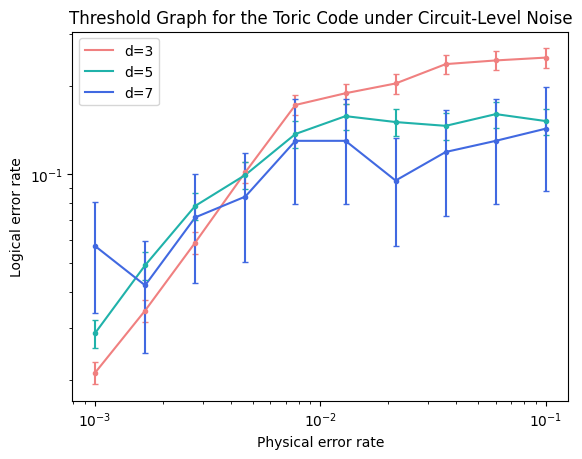

In [817]:
# Plotting

x = np.logspace(-3, -1, 10)
num_failures = {3 : 100, 5 : 100, 7 : 10}
plot_results, plot_error_bars = process_results(results_circ_qubit, num_failures)

plt.loglog(x, plot_results[3], color='lightcoral')
plt.loglog(x[:], plot_results[5][:], color='lightseagreen')
plt.loglog(x[:], plot_results[7][:], color='royalblue')

plt.errorbar(x, plot_results[3], yerr=plot_error_bars[3], fmt='.', capsize=2.5, color='lightcoral')
plt.errorbar(x[:], plot_results[5][:], yerr=plot_error_bars[5][:], fmt='.', capsize=2.5, color='lightseagreen')
plt.errorbar(x[:], plot_results[7][:], yerr=plot_error_bars[7][:], fmt='.', capsize=2.5, color='royalblue')

plt.legend(['d=3', 'd=5', 'd=7'])
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.title('Threshold Graph for the Toric Code under Circuit-Level Noise');

In [804]:
simulate(bb, 100, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, verbose=False)

0.050000000000000044

In [392]:
field = 2

x_prior = np.zeros((len(channel_prob_x), field), dtype=int)
z_prior = np.zeros((len(channel_prob_z), field), dtype=int)

for i, prob in enumerate(channel_prob_x):
    x_prior[i, 0] = 1 - prob
    for j in range(1, field):
        x_prior[i, j] = prob / (field - 1)
for i, prob in enumerate(channel_prob_z):
    z_prior[i, 0] = 1 - prob
    for j in range(1, field):
        z_prior[i, j] = prob / (field - 1)

In [408]:
dijkstra_osd_decode(bb, np.zeros(short_hx_eff.shape[0], dtype=int), x_prior, short_hx_eff.toarray())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [423]:
simulate(bb, 10, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, verbose=True)

Number of errors: 1
Number of X errors: 1
x_syndrome_history: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
x_error: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
short_hx_eff @ x_error == syndrome: True
x_syndrome_final_logical_guessed=array([0, 0])
x_syndrome_final_logical=array([0, 0])
Number of errors: 0
Number of X errors: 0
x_syndrome_history: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
x_error: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0.19999999999999996

In [198]:
GF = galois.GF(2)
g = np.zeros((2, 2), dtype=int)
gf = GF(g)
gf.__array__()

array([[0, 0],
       [0, 0]], dtype=uint8)

In [16]:
# BIG threshold graph

a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))

x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']

results = []

for d in [3, 5, 7]:
    bb = BivariateBicycle(a, b, d, d, 1)
    num_cycles = d
    for p in np.logspace(-3, -2, 10):
        error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
        circ = bb.construct_sm_circuit(x_order, z_order)
        hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)
        logical_error_rate = simulate(bb, 100, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z)
        results.append([d, p, logical_error_rate])
    print(f'Completed d = {d}')

Completed d = 3
Completed d = 5
Completed d = 7


In [17]:
results

[[3, np.float64(0.001), 0.09999999999999998],
 [3, np.float64(0.001291549665014884), 0.07999999999999996],
 [3, np.float64(0.0016681005372000592), 0.06999999999999995],
 [3, np.float64(0.0021544346900318843), 0.08999999999999997],
 [3, np.float64(0.0027825594022071257), 0.24],
 [3, np.float64(0.003593813663804626), 0.25],
 [3, np.float64(0.004641588833612777), 0.36],
 [3, np.float64(0.005994842503189409), 0.42000000000000004],
 [3, np.float64(0.007742636826811269), 0.5],
 [3, np.float64(0.01), 0.5],
 [5, np.float64(0.001), 0.12],
 [5, np.float64(0.001291549665014884), 0.15000000000000002],
 [5, np.float64(0.0016681005372000592), 0.37],
 [5, np.float64(0.0021544346900318843), 0.38],
 [5, np.float64(0.0027825594022071257), 0.32999999999999996],
 [5, np.float64(0.003593813663804626), 0.52],
 [5, np.float64(0.004641588833612777), 0.56],
 [5, np.float64(0.005994842503189409), 0.63],
 [5, np.float64(0.007742636826811269), 0.69],
 [5, np.float64(0.01), 0.72],
 [7, np.float64(0.001), 0.28],
 [

In [28]:
results_3 = [r for r in results if r[0] == 3]
results_5 = [r for r in results if r[0] == 5]
results_7 = [r for r in results if r[0] == 7]

In [29]:
results_3 = np.array(results_3)[:, 2]
results_5 = np.array(results_5)[:, 2]
results_7 = np.array(results_7)[:, 2]

In [38]:
results_7

array([0.28, 0.29, 0.4 , 0.39, 0.57, 0.61, 0.67, 0.72, 0.77, 0.74])

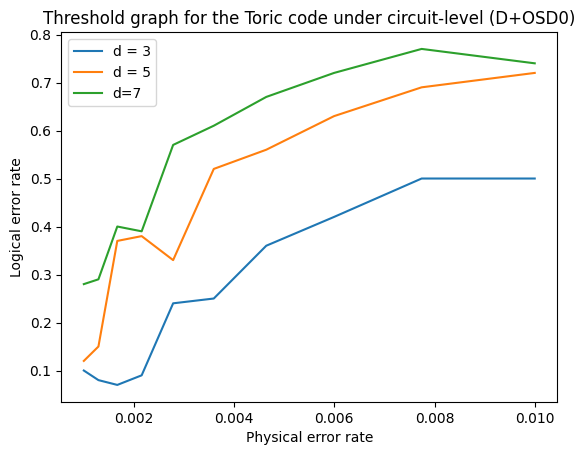

In [34]:
# BIG threshold graph

x = np.logspace(-3, -2, 10)

plt.plot(x, results_3)
plt.plot(x, results_5)
plt.plot(x, results_7)

plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.legend(['d = 3', 'd = 5', 'd=7'])
plt.title('Threshold graph for the Toric code under circuit-level (D+OSD0)');

In [818]:
# [[72, 12, 6]]

a = Polynomial(3, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(3, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bbg0 = BivariateBicycle(a, b, 6, 6, 1)

In [819]:
# [[144, 12, 12]] Gross Code

a = Polynomial(3, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(3, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bbg2 = BivariateBicycle(a, b, 6, 12, 1)

In [820]:
# [[288, 12, 18]]

# a = x^3+y^2+y^7, b = y^3 + x^2 + x
a = Polynomial(3, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(3, np.array([[0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0]]))
bbg3 = BivariateBicycle(a, b, 12, 12, 1)

In [829]:
# Code capacity model for qudit Gross code with varying field

save_data = {}
save_data_filename = f'data_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")}.json'

num_failures = 5
# results_cap_qudit_gross2 = []

for bb in [bbg3]:
    lz = bb.z_logicals
    res = []
    field = bb.field
    for p in [np.logspace(-3, -1, 10)[1]]:
        failures = 0
        num_trials = 0
        if p == 0.001:
            failures = 2
            num_trials = 5656
        while failures < num_failures:
            # Generate syndrome
            n_qudits = bb.hx.shape[1]
            error = np.zeros(n_qudits, dtype=int)
            error_mask = np.random.rand(n_qudits) < p
            for i in np.where(error_mask)[0]:
                error[i] = np.random.randint(1, field)
            syndrome = (bb.hx @ error) % field

            # Construct error probability
            channel_prob_x = np.ones(n_qudits)
            channel_prob_x *= (1/n_qudits) * p

            x_prior = np.zeros((len(channel_prob_x), field), dtype=int)

            for i, prob in enumerate(channel_prob_x):
                x_prior[i, 0] = 1 - prob
                for j in range(1, field):
                    x_prior[i, j] = prob / (field - 1)

            # Decode
            guessed_error = dijkstra_osd_decode(bb, syndrome, x_prior, bb.hx)
            error_difference = (error - guessed_error) % field
            logical_effect = (np.array(lz) @ error_difference) % field

            # Check success
            if np.any(logical_effect != 0):
                failures += 1
                print(f'Found {failures} / {num_failures}, with num_trials : {num_trials}')

            if num_trials % 10 == 0:
                save_data['num_trials'] = num_trials
                save_data['failures'] = failures
                json.dump(save_data, open(save_data_filename, 'w'), indent=4)
            num_trials += 1
        res.append(num_trials)
        print(f'Finished p={p} for d={d}, with num_trials : {num_trials}')
    print(f'Completed bb{ind}')

Found 1 / 5, with num_trials : 342


KeyboardInterrupt: 

In [830]:
results_cap_qudit_gross2

[[17660, 3664, 1935, 783, 190, 55, 54, 8, 7, 5],
 [32260, 14456, 3657, 930, 172, 53, 40, 9, 5, 5]]

In [842]:
to_add = [7544, 843, 1167, 451, 125, 30, 18, 11, 5, 4]

In [843]:
results_cap_qudit_gross2.append(to_add)

In [840]:
results_cap_qudit_gross2

[[17660, 3664, 1935, 783, 190, 55, 54, 8, 7, 5],
 [32260, 14456, 3657, 930, 172, 53, 40, 9, 5, 5],
 [7544, 342, 1167, 451, 125, 30, 18, 11, 5, 4],
 [7544, 684, 1167, 451, 125, 30, 18, 11, 5, 4]]

In [835]:
def process_results(results, num_failures):
    plot_results = {}
    plot_error_bars = {}
    for d in results:
        plot_results[d] = num_failures[d] / (np.array(results[d]))
        plot_error_bars[d] = np.sqrt((plot_results[d])*(1-plot_results[d])/results[d])
    return plot_results, plot_error_bars

C:\Users\elean\AppData\Local\Temp\ipykernel_21860\1591005615.py:6: RuntimeWarning: invalid value encountered in sqrt
  plot_error_bars[d] = np.sqrt((plot_results[d])*(1-plot_results[d])/results[d])


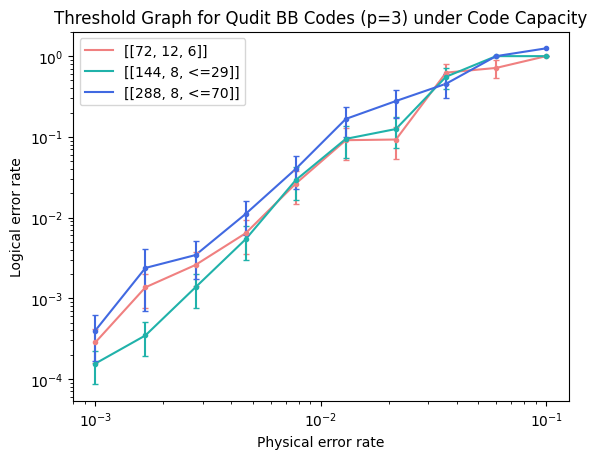

In [844]:
# Plotting

results = {}
results[3] = results_cap_qudit_gross2[0]
results[5] = results_cap_qudit_gross2[1]
results[7] = results_cap_qudit_gross2[4]

x = np.logspace(-3, -1, 10)
num_failures = {3 : 10*[5], 5 : np.array(10*[5]), 7 : np.array([3] + [2] + [4] + 7*[5])}
plot_results, plot_error_bars = process_results(results, num_failures)

plt.loglog(x, plot_results[3], color='lightcoral')
plt.loglog(x[:], plot_results[5][:], color='lightseagreen')
plt.loglog(x[:], plot_results[7][:], color='royalblue')

plt.errorbar(x, plot_results[3], yerr=plot_error_bars[3], fmt='.', capsize=2.5, color='lightcoral')
plt.errorbar(x[:], plot_results[5][:], yerr=plot_error_bars[5][:], fmt='.', capsize=2.5, color='lightseagreen')
plt.errorbar(x[:], plot_results[7][:], yerr=plot_error_bars[7][:], fmt='.', capsize=2.5, color='royalblue')

plt.legend(['[[72, 12, 6]]', '[[144, 8, <=29]]', '[[288, 8, <=70]]'])
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.title('Threshold Graph for Qudit BB Codes (p=3) under Code Capacity');